In [1]:
import sys
import os
import numpy as np
import multiprocessing
import dill
import matplotlib.pyplot as plt
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/../src/simulations_v2")
    sys.path.append(module_path + "/..")
from load_params import load_params

from multi_group_simulation import MultiGroupSimulation

In [2]:
from util_functions import *
from uncertainty_analysis import *
from sim_helper_functions import *
from plot_utils import *
configure_plot(plt)

In [3]:
def load_sim_inf_hosp_output(sim_output_files):
    scenario_data = pd.DataFrame(columns=UNCERTAINTY_PARAMS_LIST+\
            ['res_cornell_inf_10','res_cornell_inf_50','res_cornell_inf_90','res_ithaca_inf_10',
                'res_ithaca_inf_50','res_ithaca_inf_90']+\
            ['vir_cornell_inf_10','vir_cornell_inf_50','vir_cornell_inf_90',
                'vir_ithaca_inf_10','vir_ithaca_inf_50','vir_ithaca_inf_90']+\
            ['res_cornell_hosp_10','res_cornell_hosp_50','res_cornell_hosp_90','res_ithaca_hosp_10',
                'res_ithaca_hosp_50','res_ithaca_hosp_90']+\
            ['vir_cornell_hosp_10','vir_cornell_hosp_50','vir_cornell_hosp_90',
                'vir_ithaca_hosp_10','vir_ithaca_hosp_50','vir_ithaca_hosp_90'])

    for fname in sim_output_files:
        with open(fname, 'rb') as fhandle:
            [uncertainty_point, res_inf_matrix, res_hosp_matrix, virtual_inf_matrix, virtual_hosp_matrix] = dill.load(fhandle)

        new_row = dict()
        for index, col_name in enumerate(UNCERTAINTY_PARAMS_LIST):
            if type(uncertainty_point) == dict:
                new_row[col_name] = uncertainty_point[col_name]
            else:
                new_row[col_name] = uncertainty_point[index]

        res_cornell_inf_quantiles, res_ithaca_inf_quantiles = get_stats(res_inf_matrix)
        new_row['res_cornell_inf_10'] = res_cornell_inf_quantiles[0]
        new_row['res_cornell_inf_50'] = res_cornell_inf_quantiles[1]
        new_row['res_cornell_inf_90'] = res_cornell_inf_quantiles[2]
        new_row['res_ithaca_inf_10'] = res_ithaca_inf_quantiles[0]
        new_row['res_ithaca_inf_50'] = res_ithaca_inf_quantiles[1]
        new_row['res_ithaca_inf_90'] = res_ithaca_inf_quantiles[2]

        res_cornell_hosp_quantiles, res_ithaca_hosp_quantiles = get_stats(res_hosp_matrix)
        new_row['res_cornell_hosp_10'] = res_cornell_hosp_quantiles[0]
        new_row['res_cornell_hosp_50'] = res_cornell_hosp_quantiles[1]
        new_row['res_cornell_hosp_90'] = res_cornell_hosp_quantiles[2]
        new_row['res_ithaca_hosp_10'] = res_ithaca_hosp_quantiles[0]
        new_row['res_ithaca_hosp_50'] = res_ithaca_hosp_quantiles[1]
        new_row['res_ithaca_hosp_90'] = res_ithaca_hosp_quantiles[2]


        if virtual_inf_matrix != None:
            vir_cornell_inf_quantiles, vir_ithaca_inf_quantiles = get_stats(virtual_inf_matrix)
            new_row['vir_cornell_inf_10'] = vir_cornell_inf_quantiles[0]
            new_row['vir_cornell_inf_50'] = vir_cornell_inf_quantiles[1]
            new_row['vir_cornell_inf_90'] = vir_cornell_inf_quantiles[2]
            new_row['vir_ithaca_inf_10'] = vir_ithaca_inf_quantiles[0]
            new_row['vir_ithaca_inf_50'] = vir_ithaca_inf_quantiles[1]
            new_row['vir_ithaca_inf_90'] = vir_ithaca_inf_quantiles[2]
            
            vir_cornell_hosp_quantiles, vir_ithaca_hosp_quantiles = get_stats(virtual_hosp_matrix)
            new_row['vir_cornell_hosp_10'] = vir_cornell_hosp_quantiles[0]
            new_row['vir_cornell_hosp_50'] = vir_cornell_hosp_quantiles[1]
            new_row['vir_cornell_hosp_90'] = vir_cornell_hosp_quantiles[2]
            new_row['vir_ithaca_hosp_10'] = vir_ithaca_hosp_quantiles[0]
            new_row['vir_ithaca_hosp_50'] = vir_ithaca_hosp_quantiles[1]
            new_row['vir_ithaca_hosp_90'] = vir_ithaca_hosp_quantiles[2]


        else:
            new_row['vir_cornell_inf_10'] = None
            new_row['vir_cornell_inf_50'] = None
            new_row['vir_cornell_inf_90'] = None
            new_row['vir_ithaca_inf_10'] = None
            new_row['vir_ithaca_inf_50'] = None
            new_row['vir_ithaca_inf_90'] = None

            new_row['vir_cornell_hosp_10'] = None
            new_row['vir_cornell_hosp_50'] = None
            new_row['vir_cornell_hosp_90'] = None
            new_row['vir_ithaca_hosp_10'] = None
            new_row['vir_ithaca_hosp_50'] = None
            new_row['vir_ithaca_hosp_90'] = None


        scenario_data = scenario_data.append(new_row, ignore_index=True)
    return scenario_data

In [4]:
lhs_output_sim_files = []
for i in range(2000):
    fname = '/home/aaj54/group-testing/notebooks/apr_29_scenarios/point_{}.dill'.format(i)
    lhs_output_sim_files.append(fname)


In [5]:
scenario_data = load_sim_inf_hosp_output(lhs_output_sim_files)

In [6]:
scenario_data

,asymp_prob_mult,inital_prev_mult,R0,outside_inf_mult,daily_self_report_prob,ct_mult,ct_testing_ratio,test_sensitivity,test_noncompliance,E_time,...,res_cornell_hosp_90,res_ithaca_hosp_10,res_ithaca_hosp_50,res_ithaca_hosp_90,vir_cornell_hosp_10,vir_cornell_hosp_50,vir_cornell_hosp_90,vir_ithaca_hosp_10,vir_ithaca_hosp_50,vir_ithaca_hosp_90
0,0.814070,1.311587,2.667159,0.559526,0.433999,1.734734,1.481098,0.463753,0.110038,1.908848,...,2.764220,4.315439,4.894638,5.355550,3.384928,5.857032,9.436168,5.816462,7.443929,9.348759
1,1.071705,1.396065,3.003018,0.954140,0.318286,1.334421,1.242296,0.636049,0.069226,2.158343,...,3.237105,6.114219,6.832099,7.594847,36.031857,40.752295,44.263410,35.127187,39.972879,44.006876
2,1.354560,1.444255,3.154749,0.767132,0.298725,1.145546,0.901955,0.684019,0.067640,2.565228,...,6.759471,6.970781,8.035364,9.234551,40.283172,41.649225,43.342455,64.515410,68.953215,75.707816
3,1.073952,0.974614,2.017099,1.062981,0.482674,1.502931,1.452472,0.448028,0.082036,1.053829,...,1.914938,4.115575,4.609118,5.318840,1.727959,2.420469,3.420376,5.180159,5.914354,6.652629
4,1.034604,0.657916,2.138854,0.798435,0.249314,1.286527,1.103609,0.562931,0.058738,2.492906,...,1.864240,3.495587,3.976894,4.649906,4.850584,12.937918,19.342647,6.032642,10.523472,14.239318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.183238,1.407453,3.541220,0.852973,0.406786,1.220939,1.231339,0.556527,0.122889,2.924717,...,7.214190,7.252222,8.280096,9.226393,58.119594,59.489697,61.414230,111.214337,117.246979,123.638561
1996,1.151077,0.682027,2.909820,1.384771,0.436275,1.069835,1.449415,0.740463,0.085561,1.302358,...,3.547647,6.962623,7.912998,8.940872,64.282033,66.572930,68.466243,138.583523,144.901685,150.575386
1997,0.804666,1.349087,2.247899,1.484710,0.256607,1.238310,1.140603,0.662714,0.072634,2.725435,...,3.246512,7.411298,8.137336,8.944951,8.281762,15.256147,21.460919,12.057125,15.662842,19.109483
1998,0.867225,0.751257,3.628460,1.269945,0.306629,1.137000,0.852019,0.661978,0.092255,2.181886,...,15.355202,9.585333,11.114908,12.493564,69.938563,72.096001,74.210586,115.378859,122.712658,129.332656


In [17]:
scenario_data['res_cornell_inf_50'], scenario_data['res_cornell_hosp_50']

(0       162.0
 1       248.0
 2       590.0
 3       153.0
 4       131.0
         ...  
 1995    526.0
 1996    279.0
 1997    206.5
 1998    851.0
 1999    108.5
 Name: res_cornell_inf_50, Length: 2000, dtype: float64,
 0        2.097084
 1        2.658855
 2        4.433804
 3        1.670886
 4        1.529219
           ...    
 1995     4.713491
 1996     2.923074
 1997     2.804376
 1998    10.392190
 1999     1.150365
 Name: res_cornell_hosp_50, Length: 2000, dtype: float64)

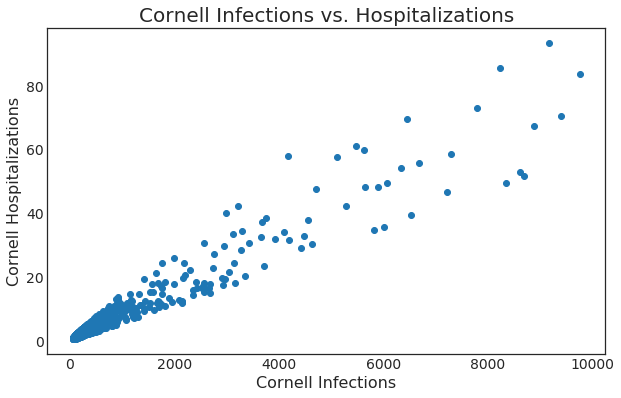

In [7]:
plt.figure(figsize=(10,6))
plt.scatter('res_cornell_inf_50', 'res_cornell_hosp_50', data=scenario_data)
plt.xlabel('Cornell Infections')
plt.ylabel('Cornell Hospitalizations')
plt.title('Cornell Infections vs. Hospitalizations')
plt.show()

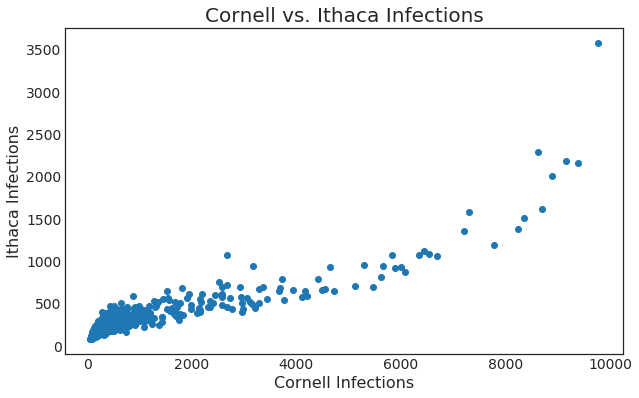

In [8]:
plt.figure(figsize=(10,6))
plt.scatter('res_cornell_inf_50', 'res_ithaca_inf_50', data=scenario_data)
plt.xlabel('Cornell Infections')
plt.ylabel('Ithaca Infections')
plt.title('Cornell vs. Ithaca Infections')
plt.show()

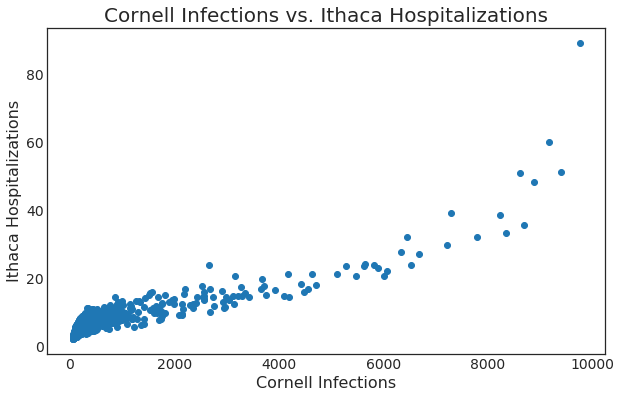

In [9]:
plt.figure(figsize=(10,6))
plt.scatter('res_cornell_inf_50', 'res_ithaca_hosp_50', data=scenario_data)
plt.xlabel('Cornell Infections')
plt.ylabel('Ithaca Hospitalizations')
plt.title('Cornell Infections vs. Ithaca Hospitalizations')
plt.show()